# **Data Description**

In this work we will use a dataset of 200 customers that include the following attributes:

* **CustomerID**-Unique ID assigned to the customer.
* **Gender**-Gender of the customer
* **Age**-Age of the customer
* **Annual Income (k$)**-Annual Income of the customer
* **Spending Score (1-100)**-Score assigned by the mall based on customer behavior and spending nature

**Aim:**

The aim of this work, is to takle the following things:

* **Univariate and multivariate Data visualisation**
* **Data pre-processing for K-Means clustering**
* **Building a K-Means clustering algorithm**
* **The metrics used to evaluate the performance of a clustering model**
* **Visualizing clusters built**
* **Interpretation and analysis of clusters built**





#**Import Necessary Libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

# **Selecting color palette**

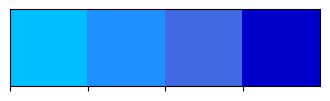

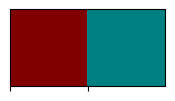

In [ ]:
# --- Create List of Color Palletes ---
blue_palette=['#00bfff','#1e90ff','#4169e1','#0000cd']
mixt_palette = ['#800000', '#008080']

# --- Plot Color Palletes --
sns.palplot(blue_palette)
sns.palplot(mixt_palette)

# **Data Loading and Overview**

In [5]:
df=pd.read_csv('/content/Mall_Customers.csv')
df.head(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [6]:
#summary of df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


There are five variables in the dataset, four of them are float and one is object. CustomerID is the unique identifier of each customer in the dataset, we can drop this variable. It doesn't provide us with any useful information.
The dataset doesn't have any missing values.


In [7]:
#Drop CustomerID from dataset
df.drop('CustomerID',axis=1,inplace=True)

# **Data Visualization**
**Histogram & Boxplot: Visualization of continuous variables**

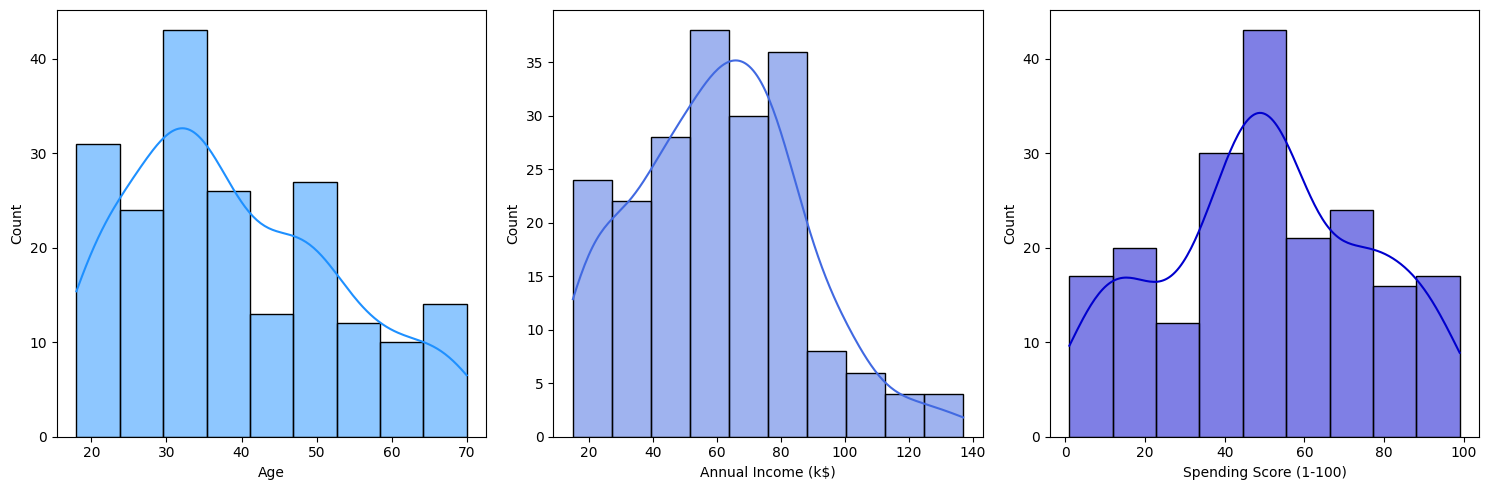

/tmp/ipython-input-4057187679.py:50: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(['Age', 'Annual Income (k$)',


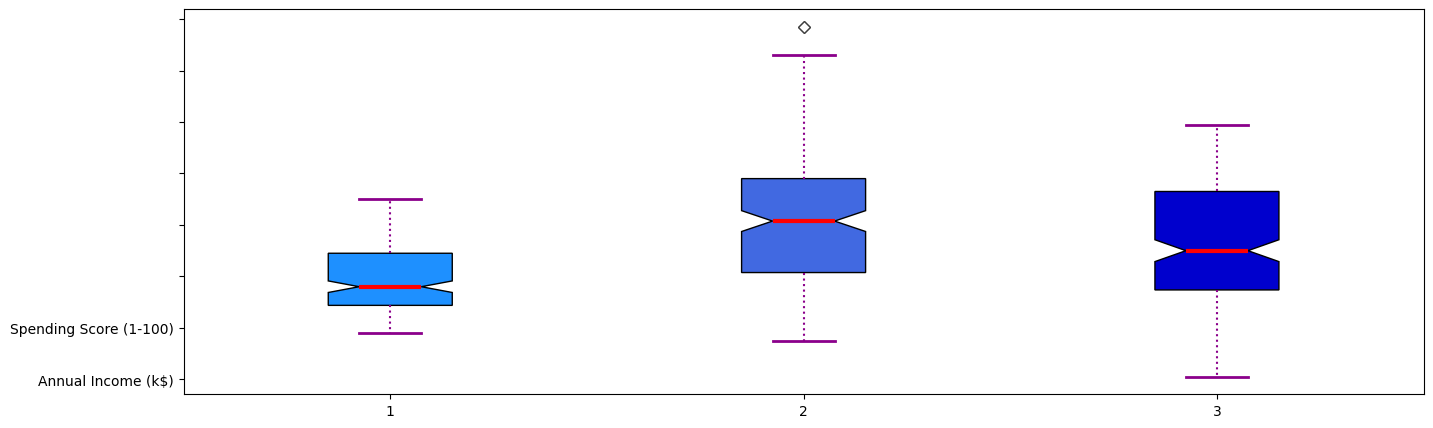

In [8]:
#------------------CREAT HISTOGRAM---------------------------------
f, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))
sns.histplot(x="Age", data=df, color=blue_palette[1],kde=True,ax=axes[0])
sns.histplot(x="Annual Income (k$)", data=df, color=blue_palette[2],kde=True,ax=axes[1])
sns.histplot(x="Spending Score (1-100)", data=df, color=blue_palette[3],kde=True,ax=axes[2])
f.tight_layout()
plt.show()

# --------------CREATE BOXPLOT----------------------------------------
features= ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']

fig = plt.figure(figsize =(16, 5))
ax = fig.add_subplot(111)

# Creating axes instance
bp = ax.boxplot(df[features], patch_artist = True,
                notch ='True', vert = 0)

colors = [blue_palette[1], blue_palette[2] ,blue_palette[3]]

for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)

# changing color and linewidth of
# whiskers
for whisker in bp['whiskers']:
    whisker.set(color ='#8B008B',
                linewidth = 1.5,
                linestyle =":")

# changing color and linewidth of
# caps
for cap in bp['caps']:
    cap.set(color ='#8B008B',
            linewidth = 2)

# changing color and linewidth of
# medians
for median in bp['medians']:
    median.set(color ='red',
               linewidth = 3)

# changing style of fliers
for flier in bp['fliers']:
    flier.set(marker ='D',
              color ='#e7298a',
              alpha = 0.5)

# x-axis labels
ax.set_yticklabels(['Age', 'Annual Income (k$)',
                    'Spending Score (1-100)'])

# Removing top axes and right axes
# ticks
ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()

# show plot
plt.show()


*  Most of the customers are aged between 30 and 35. The average age is 39.
*  The average annual income is arround 61 K$.
*  Most of the customers have a spending score between 45 and 55. The average spending score is arround 50.
*  There is only one outlier for the variable "Annual Income".


# **Barplot & Pie-chart : Visualisation of the categorical variable "Gender"**

/tmp/ipython-input-148700739.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='Gender', data=df, palette=colors, order=counts,


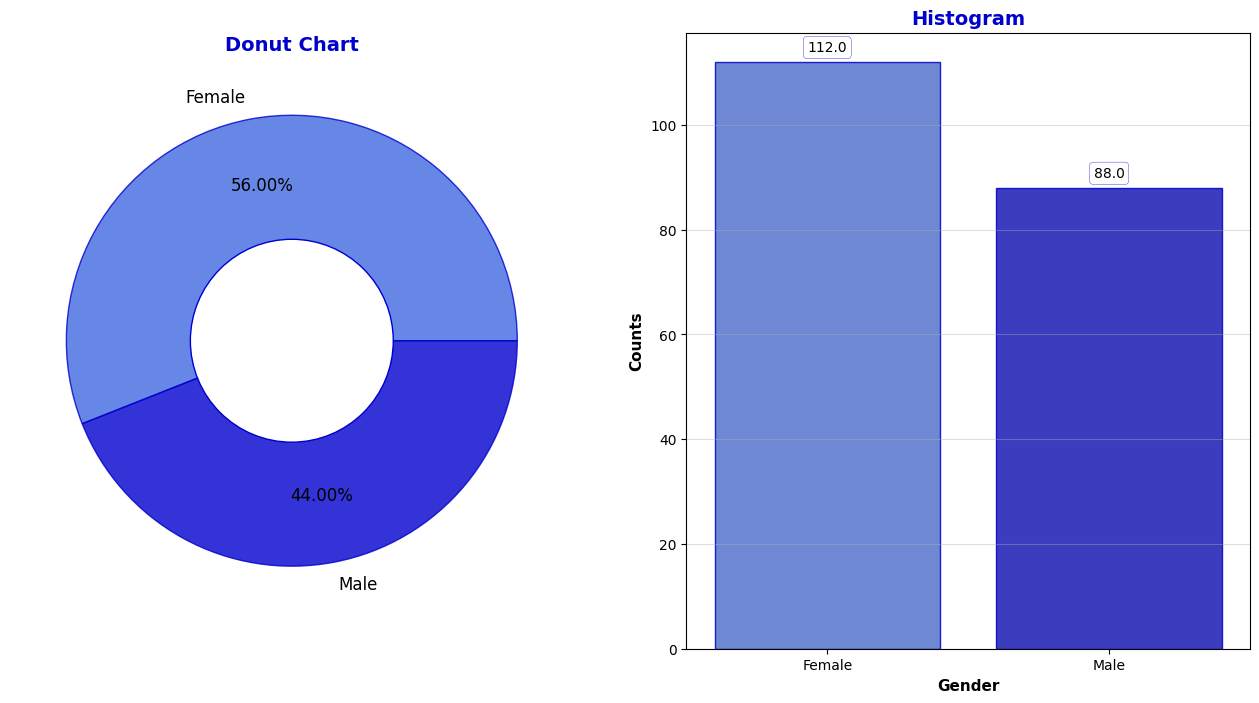

In [9]:

colors=[blue_palette[2],blue_palette[3]]
labels=['Female', 'Male']
counts=df['Gender'].value_counts().index


plt.figure(figsize=(16, 8))


# --- Donute Chart ---
plt.subplot(1, 2, 1)
plt.title('Donut Chart', fontweight='bold', fontsize=14,
          fontfamily='sans-serif', color=blue_palette[3])
plt.pie(df['Gender'].value_counts(), labels=labels, colors=colors, pctdistance=0.7,
        autopct='%.2f%%', wedgeprops=dict(alpha=0.8, edgecolor=blue_palette[3]),
        textprops={'fontsize':12})
centre=plt.Circle((0, 0), 0.45, fc='white', edgecolor=blue_palette[3])
plt.gcf().gca().add_artist(centre)

# --- Barplot ---
countplt = plt.subplot(1, 2, 2)
plt.title('Histogram', fontweight='bold', fontsize=14,
          fontfamily='sans-serif', color=blue_palette[3])
ax = sns.countplot(x='Gender', data=df, palette=colors, order=counts,
                   edgecolor=blue_palette[3], alpha=0.85)
for rect in ax.patches:
    ax.text (rect.get_x()+rect.get_width()/2,
             rect.get_height()+2,rect.get_height(),
             horizontalalignment='center', fontsize=10,
             bbox=dict(facecolor='none', edgecolor=blue_palette[3],
                       linewidth=0.25, boxstyle='round'))

plt.xlabel('Gender', fontweight='bold', fontsize=11, fontfamily='sans-serif')
plt.ylabel('Counts', fontweight='bold', fontsize=11, fontfamily='sans-serif')
plt.xticks([0, 1], labels)
plt.grid(axis='y', alpha=0.4)


We can see that 56% of the customers are females, while 44% are males.


# **Marginal Histogram : Visualizing the relationship between features**

 **"Age" VS "Spending Score"**

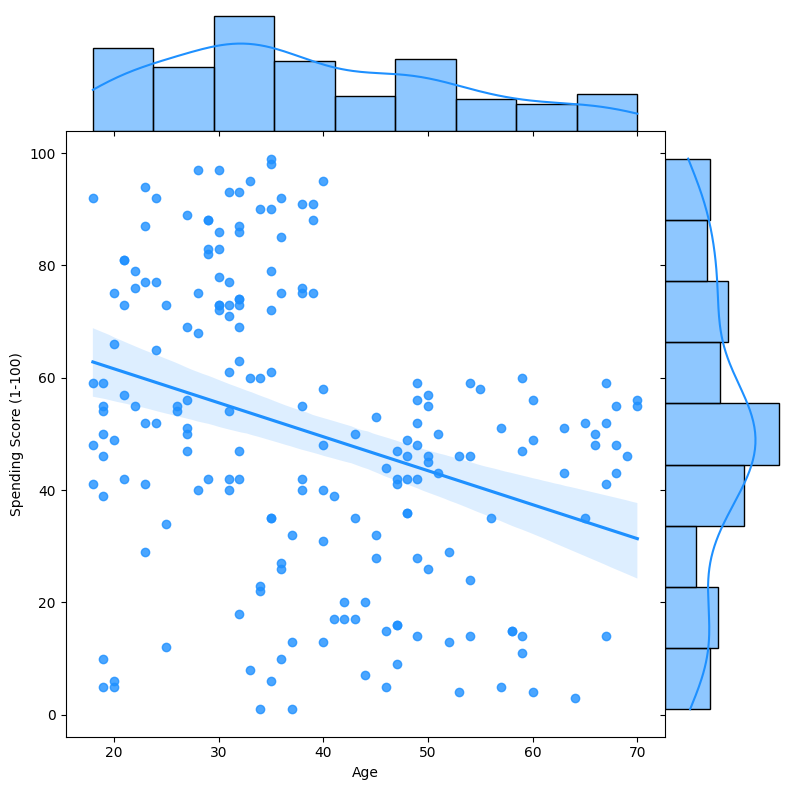

In [10]:
sns.jointplot(x="Age", y="Spending Score (1-100)",data=df, kind='reg',height=8, color=blue_palette[1],space=0)

**"Age" VS "Annual Income"**

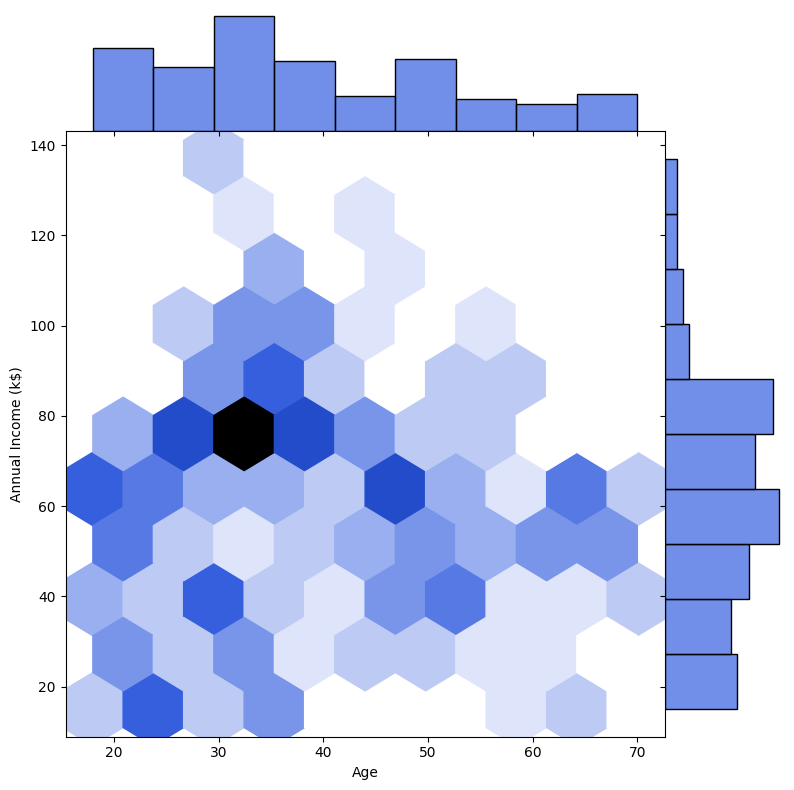

In [11]:
sns.jointplot(x=df["Age"], y=df["Annual Income (k$)"], kind='hex', color=blue_palette[2],height=8,ratio=5,space=0)

 **"Spending Score" VS "Annual Income"**

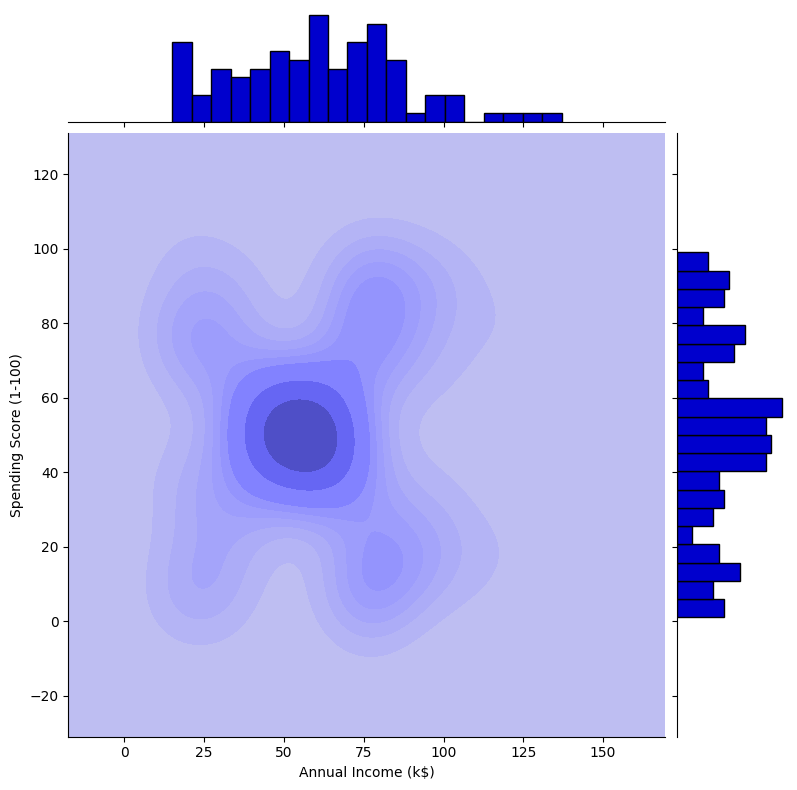

In [12]:
g = sns.JointGrid(data = df, height = 8, x = "Annual Income (k$)", y = "Spending Score (1-100)", space = 0.1)
g.plot_joint(sns.kdeplot, fill = True, thresh = 0, color = blue_palette[3])
g.plot_marginals(sns.histplot, color = blue_palette[3], alpha = 1, bins = 20);

# **Scatter plot  : Visualizing the relationship with linear regression line of best fit**

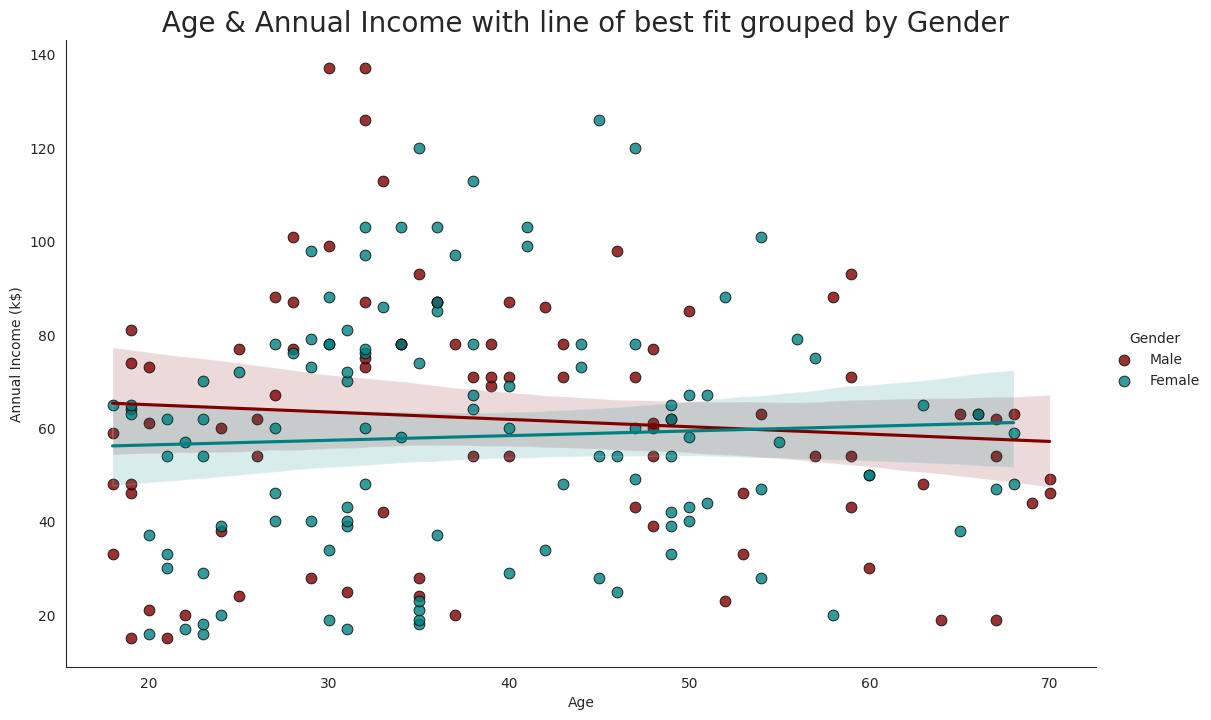

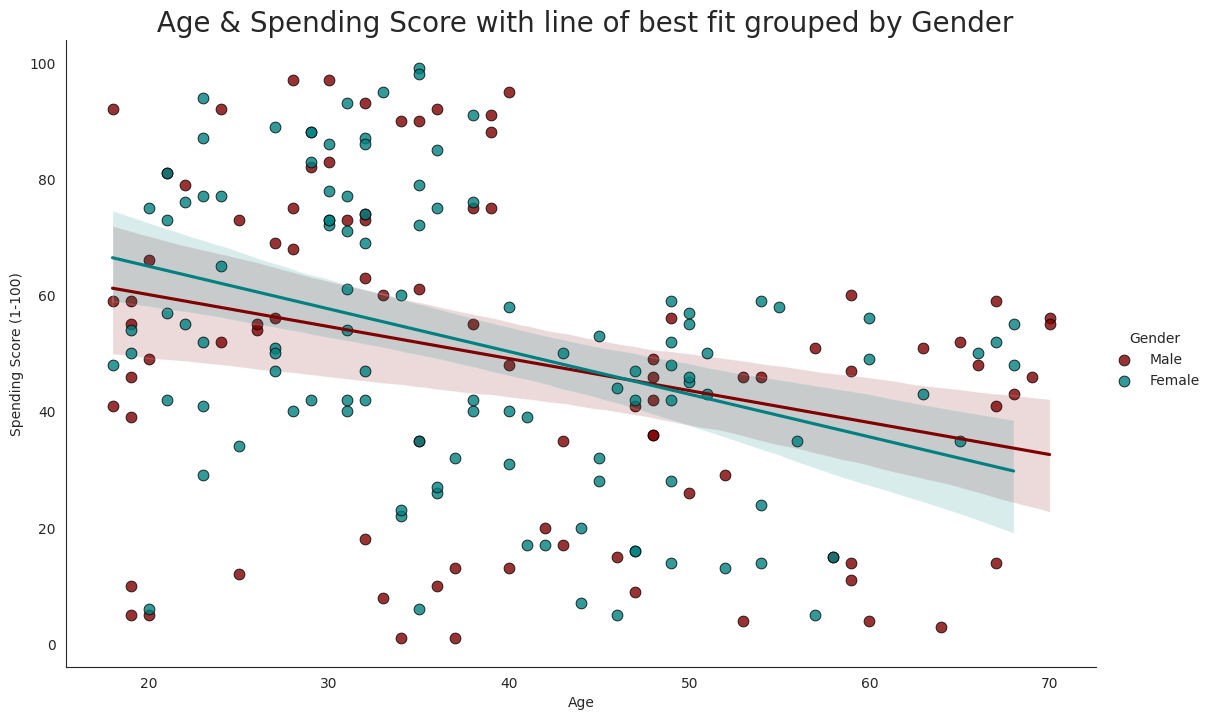

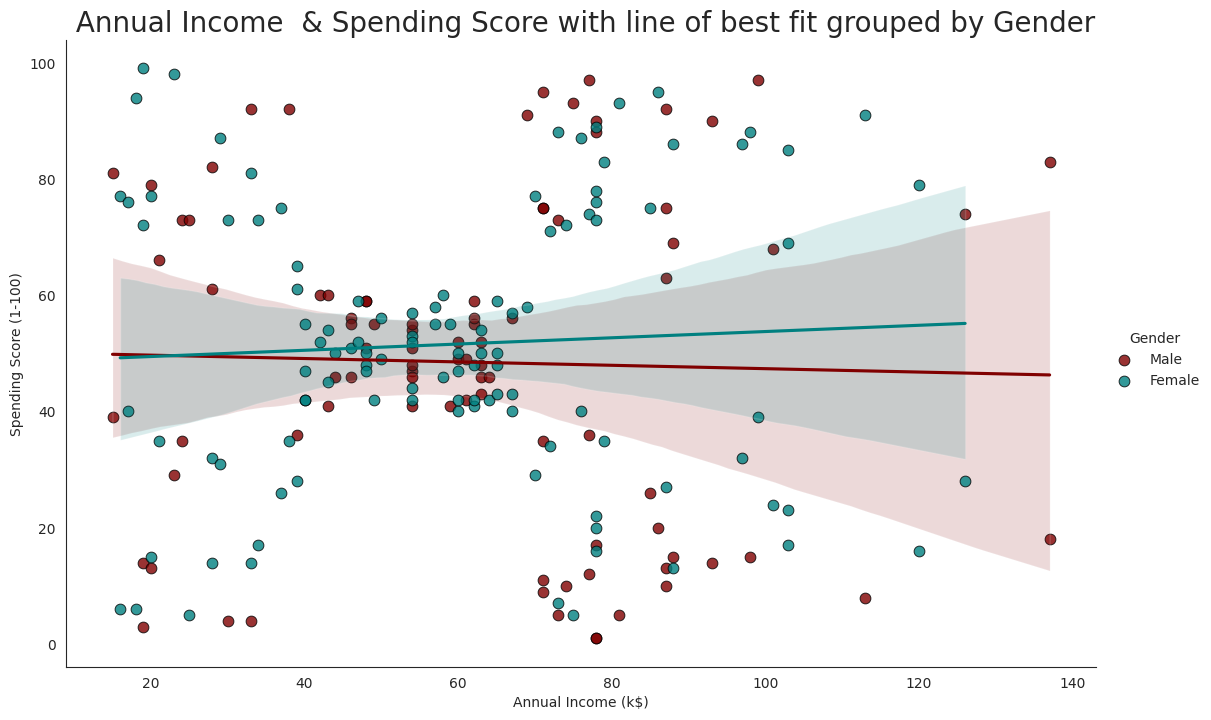

In [13]:
# Plot
sns.set_style("white")
gridobj = sns.lmplot(x="Age", y="Annual Income (k$)", hue="Gender", data=df,
                     height=7, aspect=1.6, robust=True, palette=mixt_palette,
                     scatter_kws=dict(s=60, linewidths=.7, edgecolors='black'))
plt.title(" Age & Annual Income with line of best fit grouped by Gender", fontsize=20)
plt.show()

# Plot
sns.set_style("white")
gridobj = sns.lmplot(x="Age", y="Spending Score (1-100)", hue="Gender", data=df,
                     height=7, aspect=1.6, robust=True, palette=mixt_palette,
                     scatter_kws=dict(s=60, linewidths=.7, edgecolors='black'))
plt.title(" Age & Spending Score with line of best fit grouped by Gender", fontsize=20)
plt.show()

# Plot
sns.set_style("white")
gridobj = sns.lmplot(x="Annual Income (k$)", y="Spending Score (1-100)", hue="Gender", data=df,
                     height=7, aspect=1.6, robust=True, palette=mixt_palette,
                     scatter_kws=dict(s=60, linewidths=.7, edgecolors='black'))
plt.title(" Annual Income  & Spending Score with line of best fit grouped by Gender", fontsize=20)
plt.show()


# **Heatmap : Visualizing the correlation between features**

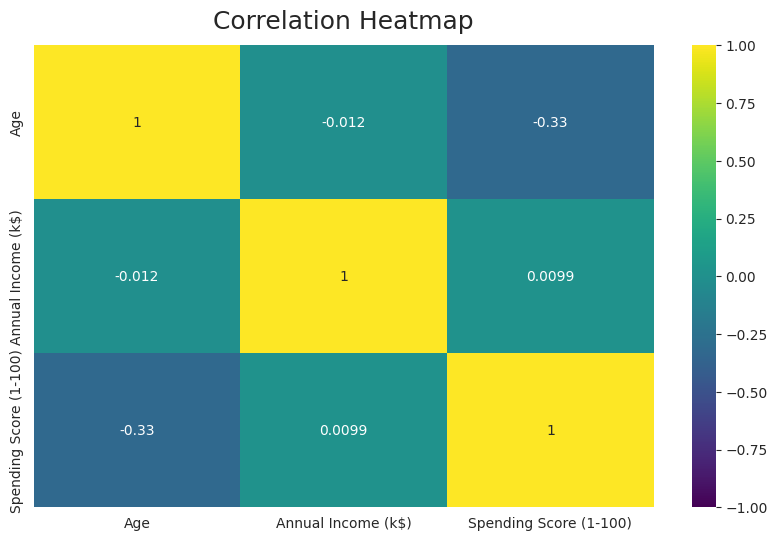

In [14]:
# ---- Compute correlation only on numeric columns ----
numeric_df = df.select_dtypes(include=['number'])

# ---- Plot heatmap ----
plt.figure(figsize=(10, 6))
heatmap = sns.heatmap(
    numeric_df.corr(),
    vmin=-1,
    vmax=1,
    annot=True,
    cmap='viridis'
)

heatmap.set_title('Correlation Heatmap', fontdict={'fontsize': 18}, pad=12)

# ---- Save heatmap as PNG ----
plt.savefig('heatmap.png', dpi=300, bbox_inches='tight')

# ---- Show the plot ----
plt.show()


# **Data Pre-Processing**



Since gender is a categorial variable, it needs to be encoded and converted into numeric. All other variables will be scaled to follow normal distribution before being fed into the model. We will standardize these variables with mean 0 and standard deviation 1.

# **Standardizing variables**

We standardize all variables in the dataset to get them around the same scale.

In [15]:
col_names = ['Annual Income (k$)', 'Age', 'Spending Score (1-100)']
sd=StandardScaler()
features = df[col_names]
scaler = sd.fit(features.values)
features = scaler.transform(features.values)
scaled_features = pd.DataFrame(features, columns = col_names)
scaled_features.head()

,Annual Income (k$),Age,Spending Score (1-100)
0,-1.738999,-1.424569,-0.434801
1,-1.738999,-1.281035,1.195704
2,-1.700830,-1.352802,-1.715913
3,-1.700830,-1.137502,1.040418
4,-1.662660,-0.563369,-0.395980


# **One-Hot Encoding**
   

In [16]:
gender = df['Gender']
newdf = scaled_features.join(gender)
newdf = pd.get_dummies(newdf, prefix=None, prefix_sep='_', dummy_na=False, columns=None, sparse=False, drop_first=False, dtype=None)
newdf = newdf.drop(['Gender_Male'],axis=1)
newdf.head()

,Annual Income (k$),Age,Spending Score (1-100),Gender_Female
0,-1.738999,-1.424569,-0.434801,False
1,-1.738999,-1.281035,1.195704,False
2,-1.700830,-1.352802,-1.715913,True
3,-1.700830,-1.137502,1.040418,True
4,-1.662660,-0.563369,-0.395980,True


# **Building the clustering model with k-means**

**Finding optimal number of clusters with Elbow Method**

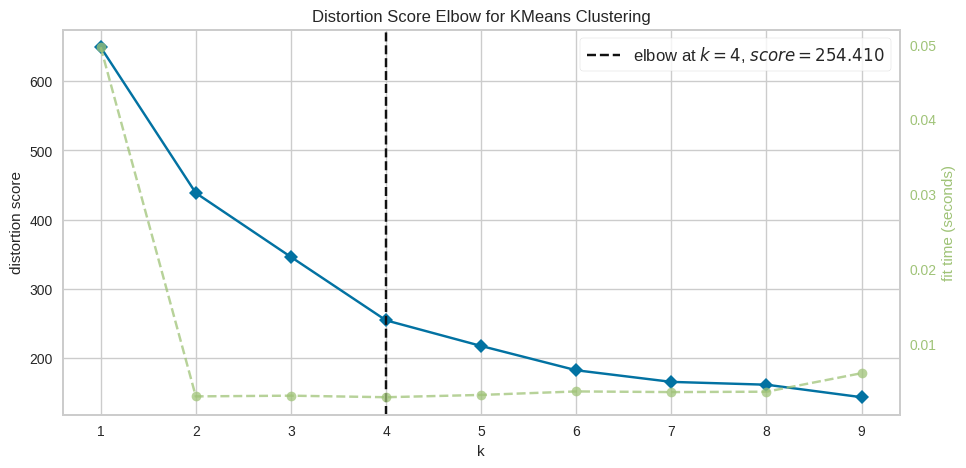

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [17]:
from yellowbrick.cluster import KElbowVisualizer

# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,10),size=(1080, 500))

visualizer.fit(newdf)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

Using the elbow method, we can observe that the optimal number of clusters is 4.

# **Implimentation of k-means & Silhouette coefficient metric**

In [18]:
# First, build a model with 4 clusters

kmeans = KMeans(n_clusters = 4, init='k-means++',random_state=42)
kmeans.fit(newdf)

# Now, print the silhouette score of this model

print("silhouette_score is :",silhouette_score(newdf, kmeans.labels_, metric='euclidean'))

silhouette_score is : 0.35044061449694197


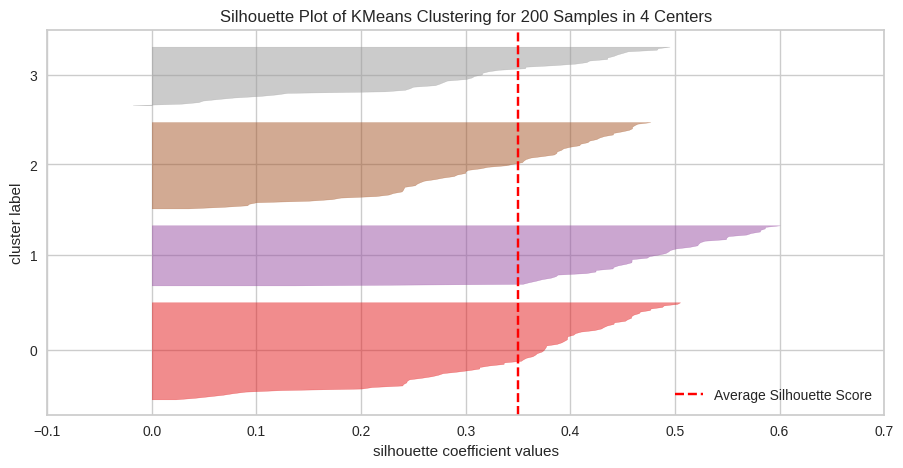

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 200 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [19]:
from yellowbrick.cluster import SilhouetteVisualizer
kmeans1 = KMeans(n_clusters = 4, init='k-means++',random_state=42)
visualizer = SilhouetteVisualizer(kmeans1,size=(1080, 500))

visualizer.fit(newdf)    # Fit the data to the visualizer
visualizer.show()    # Finalize and render the figure

The silhouette score of this model is about 0.35. This isn't a bad model, but we can do better and try getting higher cluster separation.
Before we try doing that, lets visualize the clusters we just built to get an idea of how well the model is doing.

**Visualization of clusters built by the model**

In [20]:
clusters = kmeans.fit_predict(df.iloc[:,1:])
newdf["label"] = clusters
newdf.head()

,Annual Income (k$),Age,Spending Score (1-100),Gender_Female,label
0,-1.738999,-1.424569,-0.434801,False,2
1,-1.738999,-1.281035,1.195704,False,2
2,-1.700830,-1.352802,-1.715913,True,0
3,-1.700830,-1.137502,1.040418,True,2
4,-1.662660,-0.563369,-0.395980,True,0


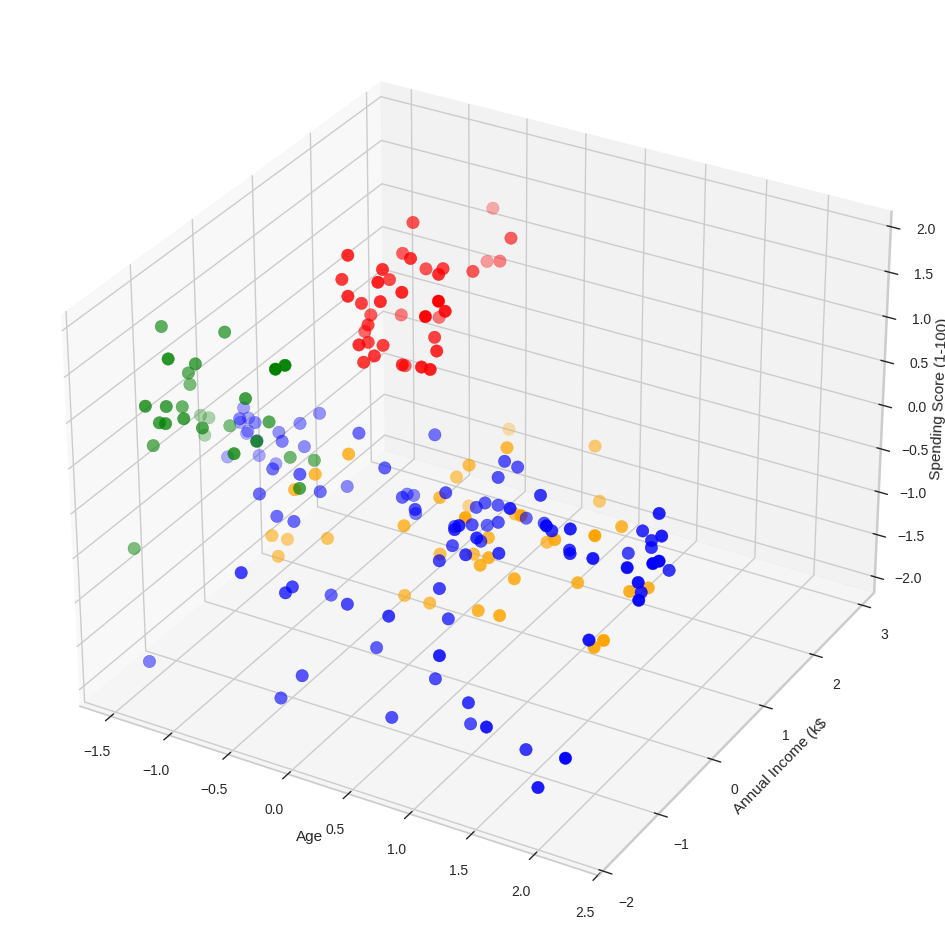

In [21]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(newdf.Age[newdf["label"] == 0], newdf["Annual Income (k$)"][newdf["label"] == 0], newdf["Spending Score (1-100)"][newdf["label"] == 0], c='blue', s=80)
ax.scatter(newdf.Age[newdf["label"] == 1], newdf["Annual Income (k$)"][newdf["label"] == 1], newdf["Spending Score (1-100)"][newdf["label"] == 1], c='red', s=80)
ax.scatter(newdf.Age[newdf["label"] == 2], newdf["Annual Income (k$)"][newdf["label"] == 2], newdf["Spending Score (1-100)"][newdf["label"] == 2], c='green', s=80)
ax.scatter(newdf.Age[newdf["label"] == 3], newdf["Annual Income (k$)"][newdf["label"] == 3], newdf["Spending Score (1-100)"][newdf["label"] == 3], c='orange', s=80)
ax.set_xlabel("Age")
ax.set_ylabel("Annual Income (k$")
ax.set_zlabel("Spending Score (1-100)")
plt.show()

From the above plot, we can see that cluster separation isn't too great.
This, along with the silhouette score shows us that the model isn't performing too well.

Now, lets create a new model that has better cluster separability than this one.

For this model, lets do some feature selection. We can use a technique called Principal Component Analysis (PCA).

PCA is a technique that helps us reduce the dimension of a dataset. When we run PCA on a data frame, new components are created. These components explain the maximum variance in the model. We can select a subset of these variables and include them in the K-means model.

# **Implimentation of PCA**

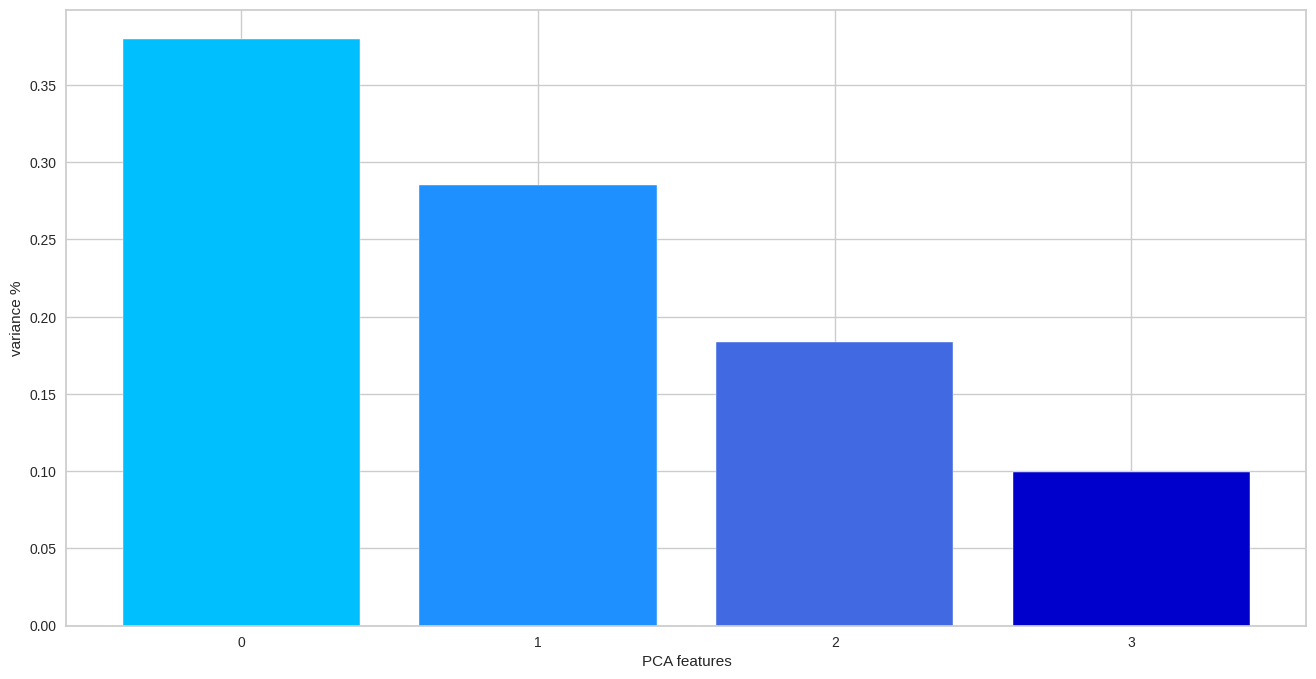

In [22]:
pca = PCA(n_components=4)
principalComponents = pca.fit_transform(newdf)
features = range(pca.n_components_)
plt.figure(figsize=(16,8))
plt.bar(features, pca.explained_variance_ratio_, color=blue_palette[0:4])
plt.xlabel('PCA features')
plt.ylabel('variance %')
plt.xticks(features)

PCA_components = pd.DataFrame(principalComponents)

This chart shows us each PCA component, along with its variance.
Based on this visualization, we can see that the first two PCA components explain more than 70% of the dataset variance. We can feed these two components into the model.

Let's build the model again with the first two principal components, and decide on the number of clusters to use.

# **Elbow Method for the new clustering model (Model 2)**

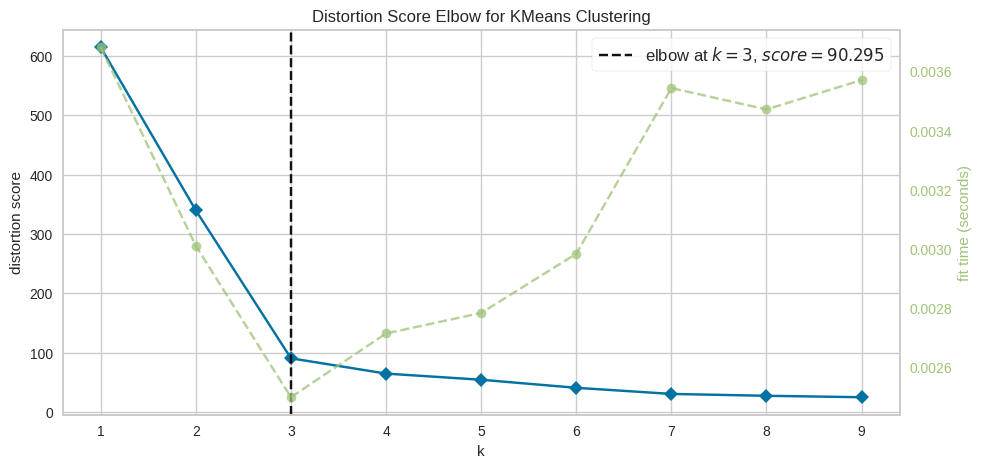

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [23]:
# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,10),size=(1080, 500))

visualizer.fit(PCA_components.iloc[:,:2])        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure


It looks like the optimal number of clusters is 4.
We can calculate the silhouette score for this model with 4 clusters.

# **Silhouette coefficient metric for the new clustering model**

In [24]:
model = KMeans(n_clusters=4, init='k-means++',random_state=42)
model.fit(PCA_components.iloc[:,:2])

# silhouette score
print("silhouette_score is :",silhouette_score(PCA_components.iloc[:,:2], model.labels_, metric='euclidean'))

silhouette_score is : 0.5558300997389769


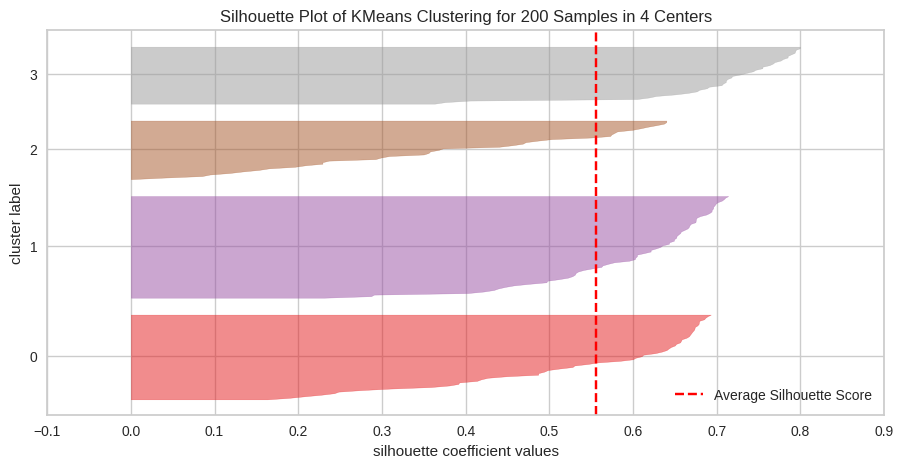

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 200 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [25]:
model1 = KMeans(n_clusters = 4, init='k-means++',random_state=42)
visualizer = SilhouetteVisualizer(model1,size=(1080, 500))
visualizer.fit(PCA_components.iloc[:,:2])    # Fit the data to the visualizer
visualizer.show()    # Finalize and render the figure)    # Fit the data to the visualizer

The silhouette score of this model is 0.54, which is better than the previous model we created.

Visualization of clusters built by the New model

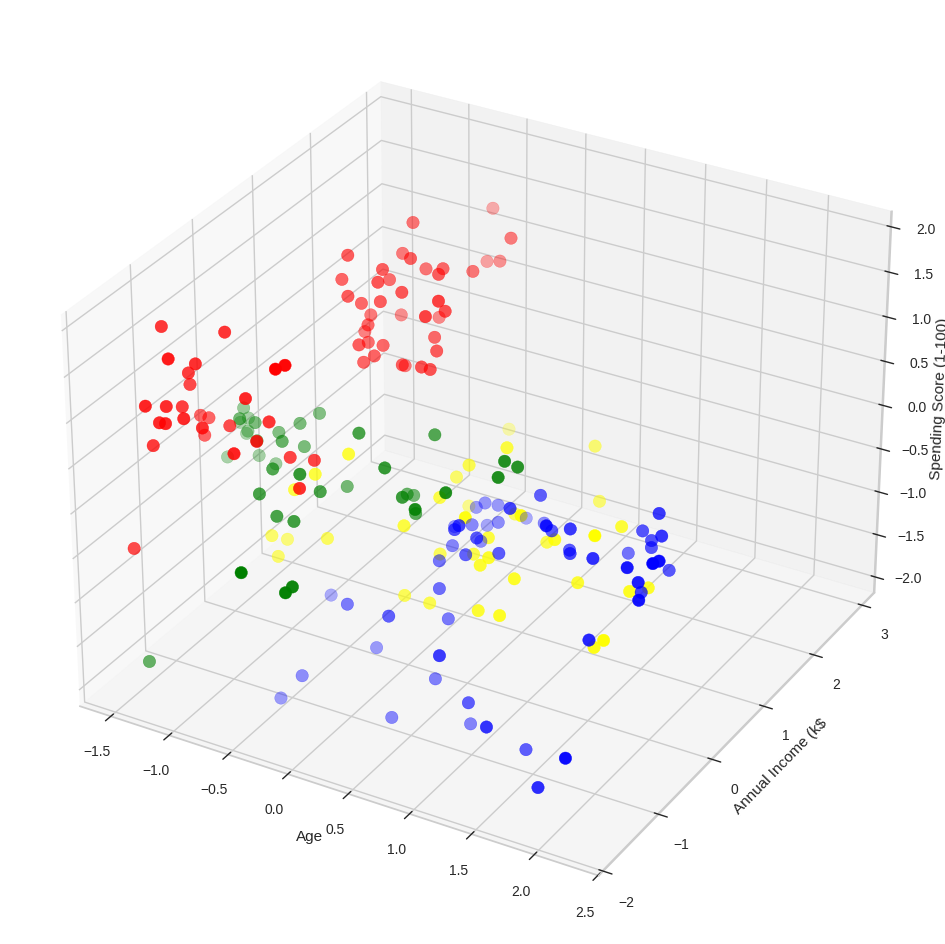

In [27]:
clusters = model.fit_predict(PCA_components.iloc[:,:2])
newdf["label"] = clusters

from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(newdf.Age[newdf["label"] == 0], newdf["Annual Income (k$)"][newdf["label"] == 0], newdf["Spending Score (1-100)"][newdf["label"] == 0], c='blue', s=80)
ax.scatter(newdf.Age[newdf["label"] == 1], newdf["Annual Income (k$)"][newdf["label"] == 1], newdf["Spending Score (1-100)"][newdf["label"] == 1], c='red', s=80)
ax.scatter(newdf.Age[newdf["label"] == 2], newdf["Annual Income (k$)"][newdf["label"] == 2], newdf["Spending Score (1-100)"][newdf["label"] == 2], c='green', s=80)
ax.scatter(newdf.Age[newdf["label"] == 3], newdf["Annual Income (k$)"][newdf["label"] == 3], newdf["Spending Score (1-100)"][newdf["label"] == 3], c='yellow', s=80)
ax.set_xlabel("Age")
ax.set_ylabel("Annual Income (k$")
ax.set_zlabel("Spending Score (1-100)")
plt.show()

**Model 1 VS Model 2**

Since the silhouette score of the second model is a lot higher, we can pick the second model to go forward with our analysis.

# **Cluster Analysis and Customer Segmentation**

Now that we're done building these different clusters, lets try to interpret them and look at the different customer segments.

First, lets map the clusters back to the dataset and take a look at the head of the data frame.

In [47]:
# 1. Ensure cluster column exists as a normal column
df_clustered = df_clustered.reset_index(drop=True)

# 2. Identify numeric columns ONLY
numeric_cols = df_clustered.select_dtypes(include='number').columns.tolist()

# Remove cluster from numeric columns for calculating means
numeric_cols = [col for col in numeric_cols if col != 'cluster']

# 3. Group by cluster and calculate average
avg_df = (
    df_clustered.groupby("cluster")[numeric_cols]
    .mean()
    .reset_index()
)

# 4. Style display (works only inside Jupyter)
avg_df




,cluster,Age,Annual Income (k$),Spending Score (1-100)
0,0,54.964286,45.375000,39.089286
1,1,29.402985,62.373134,78.835821
2,2,30.435897,53.487179,47.717949
3,3,40.394737,87.000000,18.631579


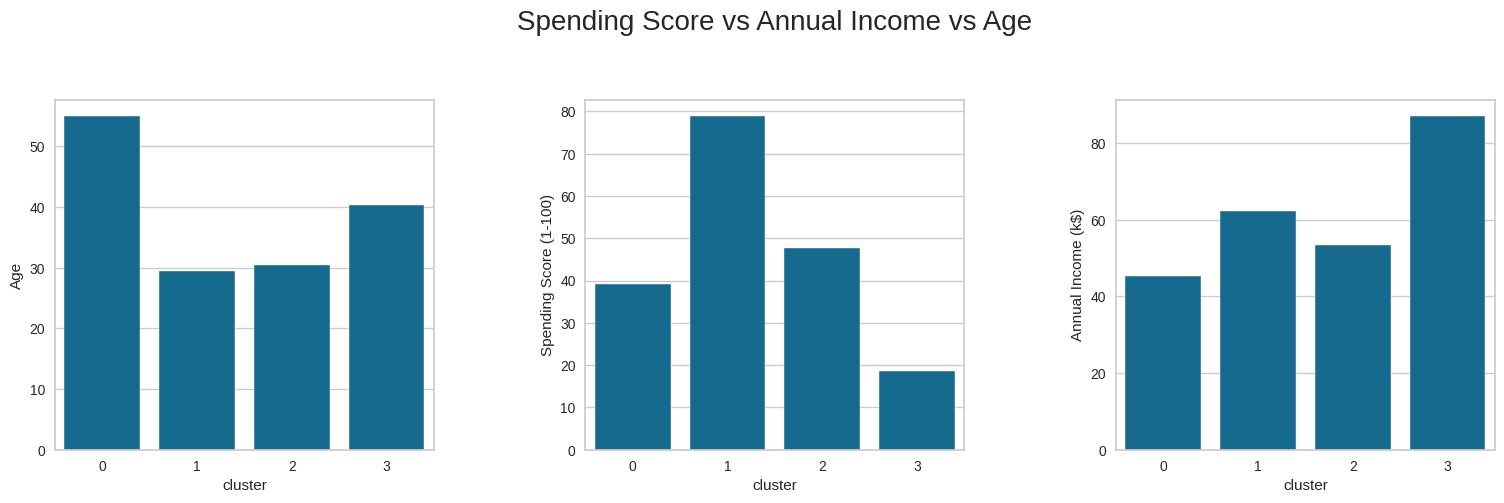

In [52]:
f, ax = plt.subplots(nrows=1, ncols=3, figsize=(18, 5))
sns.barplot(x='cluster',y='Age',data=avg_df ,ax=ax[0])
sns.barplot(x='cluster',y='Spending Score (1-100)',data=avg_df, ax=ax[1])
sns.barplot(x='cluster',y='Annual Income (k$)',data=avg_df, ax=ax[2])
plt.suptitle('Spending Score vs Annual Income vs Age',fontsize=20)
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.8,
                    wspace=0.4,
                    hspace=0.4)

fig.tight_layout()
plt.show()
